# Predicting Heart Disease using Machine Learning

# Importing the Libraries

In [91]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


## Loading the dataset

In [145]:
df = pd.read_csv(r"D:\heart.csv")
df.head() # (rows, columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Exploration

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [30]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [16]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [19]:
# Let's find out how many of each class there
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [144]:
df.head(5)

,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Slope_of_ST_Segment,Number_of_Major_Vessels,Thalassemia,Heart_Disease_Indicator
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [33]:

# Sample DataFrame (Replace with your actual DataFrame)
# df = pd.DataFrame(columns=['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
#                            'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

# Rename columns with full names
df.rename(columns={
    'cp': 'Chest_Pain_Type',
    'trestbps': 'Resting_Blood_Pressure',
    'chol': 'Serum_Cholesterol',
    'fbs': 'Fasting_Blood_Sugar',
    'restecg': 'Resting_ECG_Results',
    'thalach': 'Max_Heart_Rate_Achieved',
    'exang': 'Exercise_Induced_Angina',
    'oldpeak': 'ST_Depression',
    'slope': 'Slope_of_ST_Segment',
    'ca': 'Number_of_Major_Vessels',
    'thal': 'Thalassemia',
    'target': 'Heart_Disease_Indicator'
}, inplace=True)

# Display renamed columns
print(df.columns)


Index(['age', 'sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure',
       'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG_Results',
       'Max_Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression',
       'Slope_of_ST_Segment', 'Number_of_Major_Vessels', 'Thalassemia',
       'Heart_Disease_Indicator'],
      dtype='object')


In [147]:
df.select_dtypes(include="object").columns

Index([], dtype='object')

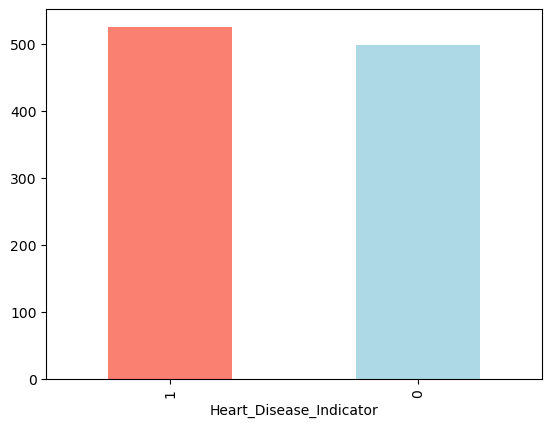

In [35]:
df["Heart_Disease_Indicator"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [113]:
categorical_features = ['Chest_Pain_Type', 'Fasting_Blood_Sugar', 'Resting_ECG_Results', 
                        'Exercise_Induced_Angina', 'Slope_of_ST_Segment', 'Number_of_Major_Vessels', 'Thalassemia']

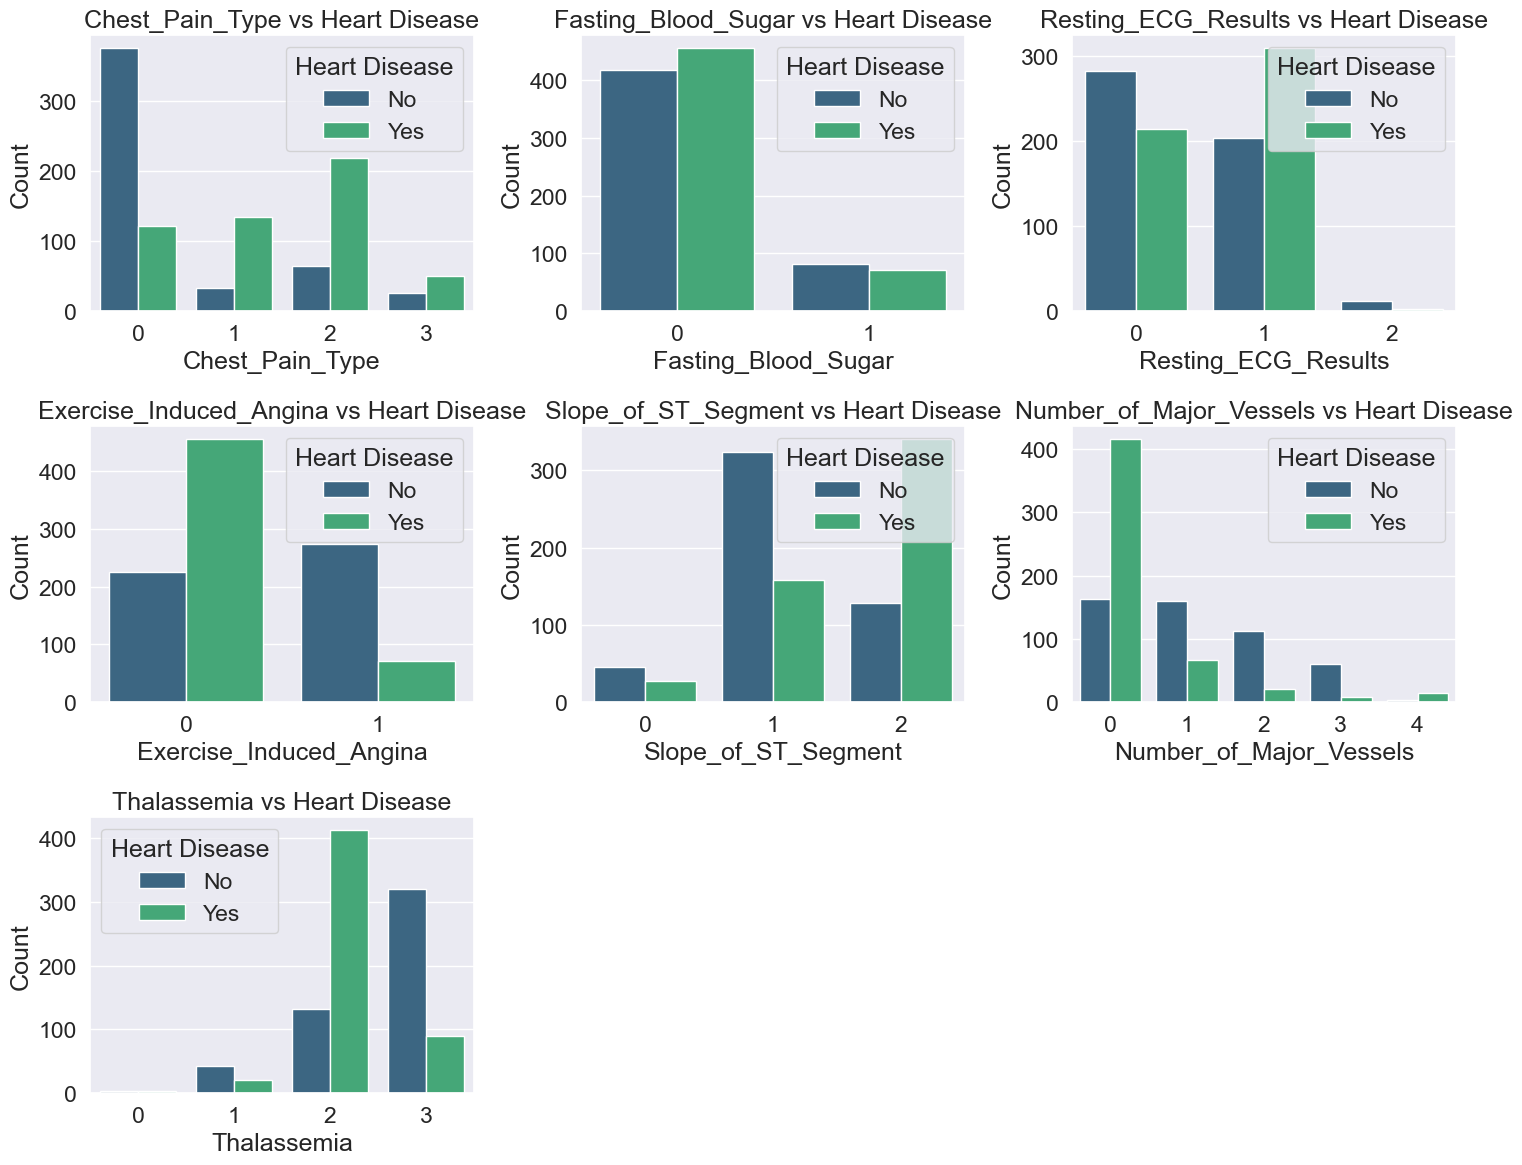

In [114]:
plt.figure(figsize=(15, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='Heart_Disease_Indicator', data=df, palette='viridis')
    plt.title(f"{feature} vs Heart Disease")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Heart Disease", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   sex                      1025 non-null   int64  
 2   Chest_Pain_Type          1025 non-null   int64  
 3   Resting_Blood_Pressure   1025 non-null   int64  
 4   Serum_Cholesterol        1025 non-null   int64  
 5   Fasting_Blood_Sugar      1025 non-null   int64  
 6   Resting_ECG_Results      1025 non-null   int64  
 7   Max_Heart_Rate_Achieved  1025 non-null   int64  
 8   Exercise_Induced_Angina  1025 non-null   int64  
 9   ST_Depression            1025 non-null   float64
 10  Slope_of_ST_Segment      1025 non-null   int64  
 11  Number_of_Major_Vessels  1025 non-null   int64  
 12  Thalassemia              1025 non-null   int64  
 13  Heart_Disease_Indicator  1025 non-null   int64  
dtypes: float64(1), int64(13)

In [37]:
# Are there any missing values?
df.isna().sum()

age                        0
sex                        0
Chest_Pain_Type            0
Resting_Blood_Pressure     0
Serum_Cholesterol          0
Fasting_Blood_Sugar        0
Resting_ECG_Results        0
Max_Heart_Rate_Achieved    0
Exercise_Induced_Angina    0
ST_Depression              0
Slope_of_ST_Segment        0
Number_of_Major_Vessels    0
Thalassemia                0
Heart_Disease_Indicator    0
dtype: int64

In [38]:
df.describe()

,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Slope_of_ST_Segment,Number_of_Major_Vessels,Thalassemia,Heart_Disease_Indicator
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [39]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [41]:
# Compare target column with sex column
pd.crosstab(df.Heart_Disease_Indicator, df.sex)

sex,0,1
Heart_Disease_Indicator,,
0,86,413
1,226,300


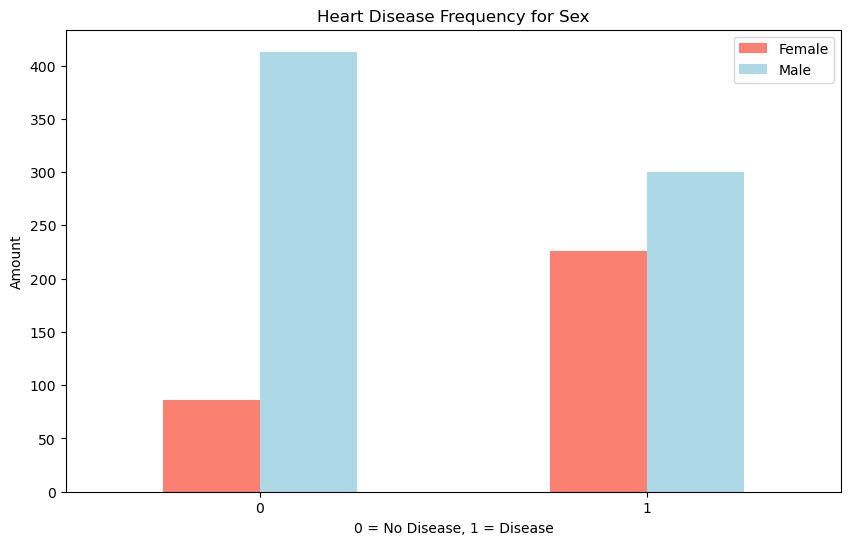

In [43]:
# Create a plot of crosstab
pd.crosstab(df.Heart_Disease_Indicator, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")q
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

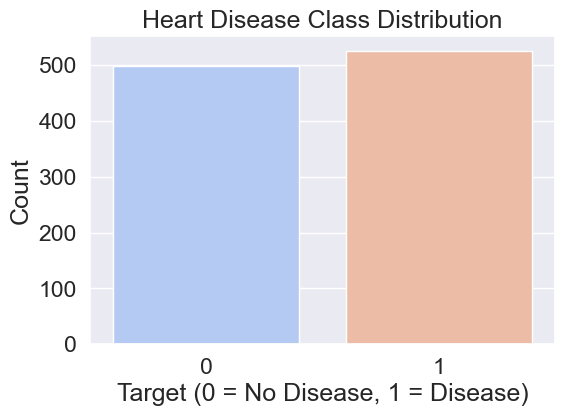

In [122]:


# Bar plot
plt.figure(figsize=(6,4))
sns.countplot(x='Heart_Disease_Indicator', data=df, palette='coolwarm')
plt.title("Heart Disease Class Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()


### This plot shows the distribution of heart disease cases. A balanced dataset is preferable for modeling.



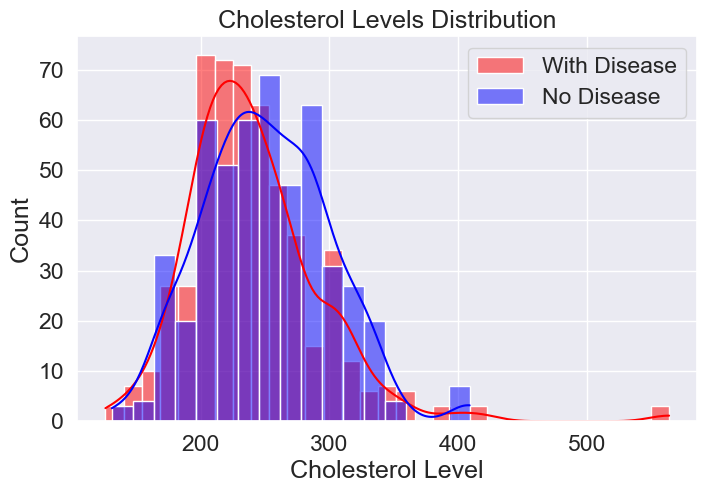

In [124]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["Heart_Disease_Indicator"] == 1]["Serum_Cholesterol"], kde=True, color="red", label="With Disease")
sns.histplot(df[df["Heart_Disease_Indicator"] == 0]["Serum_Cholesterol"], kde=True, color="blue", label="No Disease")
plt.title("Cholesterol Levels Distribution")
plt.xlabel("Cholesterol Level")
plt.legend()
plt.show()


### People with heart disease generally have higher cholesterol levels.



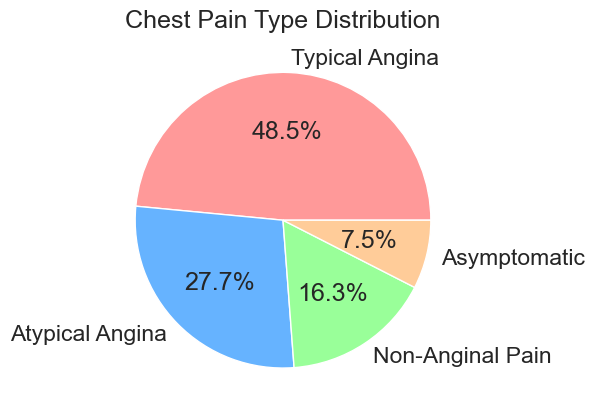

In [126]:
labels = ["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"]
df['Chest_Pain_Type'].value_counts().plot.pie(autopct='%1.1f%%', labels=labels, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Chest Pain Type Distribution")
plt.ylabel('')
plt.show()


### Different chest pain types affect heart disease risk. Asymptomatic cases are more at risk.



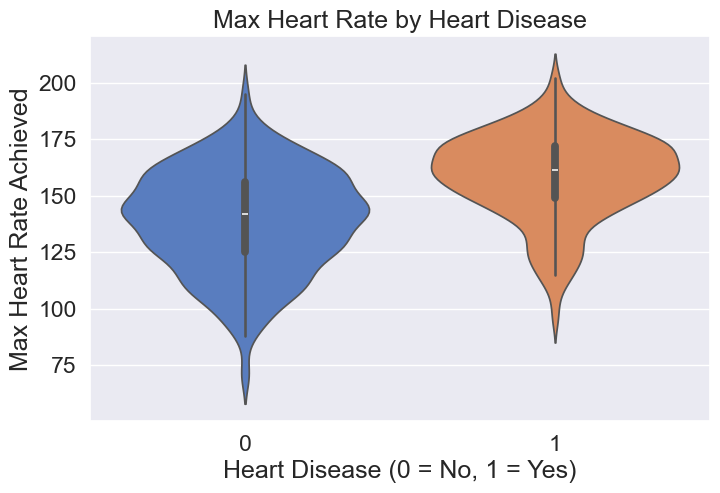

In [131]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Heart_Disease_Indicator', y='Max_Heart_Rate_Achieved', data=df, palette="muted")
plt.title("Max Heart Rate by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Max Heart Rate Achieved")
plt.show()


### People with heart disease tend to have lower maximum heart rates.



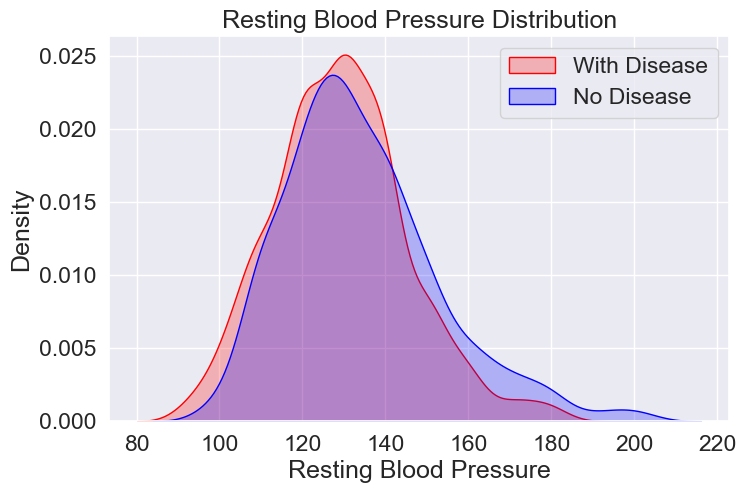

In [132]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["Heart_Disease_Indicator"] == 1]["Resting_Blood_Pressure"], shade=True, color="red", label="With Disease")
sns.kdeplot(df[df["Heart_Disease_Indicator"] == 0]["Resting_Blood_Pressure"], shade=True, color="blue", label="No Disease")
plt.title("Resting Blood Pressure Distribution")
plt.xlabel("Resting Blood Pressure")
plt.legend()
plt.show()


### Higher resting blood pressure is more common in heart disease patients.

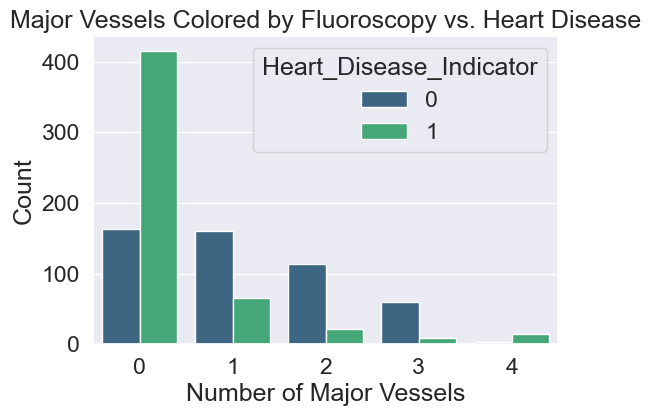

In [134]:
plt.figure(figsize=(6,4))
sns.countplot(x='Number_of_Major_Vessels', hue='Heart_Disease_Indicator', data=df, palette='viridis')
plt.title("Major Vessels Colored by Fluoroscopy vs. Heart Disease")
plt.xlabel("Number of Major Vessels")
plt.ylabel("Count")
plt.show()

### More major vessels affected increases the risk of heart disease.

## Age vs. Max Heart Rate for Heart Disease

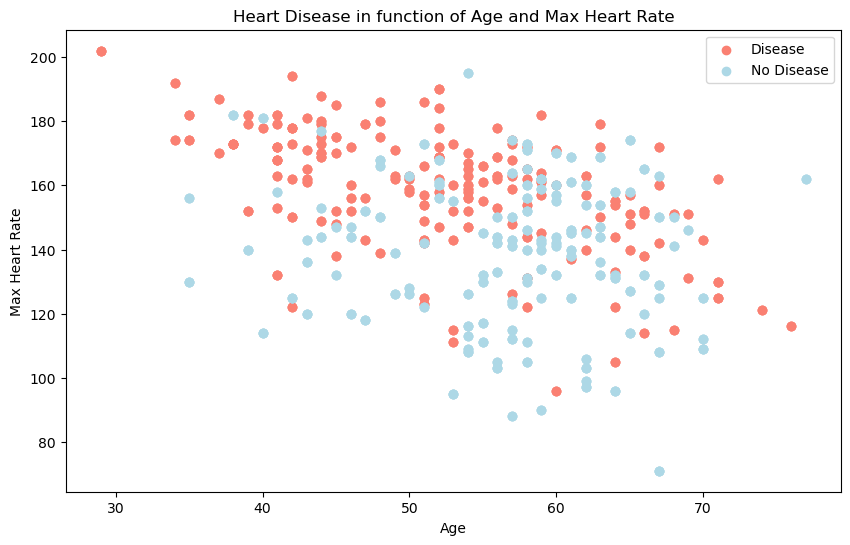

In [47]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.Heart_Disease_Indicator==1],
            df.Max_Heart_Rate_Achieved[df.Heart_Disease_Indicator==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.Heart_Disease_Indicator==0],
            df.Max_Heart_Rate_Achieved[df.Heart_Disease_Indicator==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

<Axes: ylabel='Frequency'>

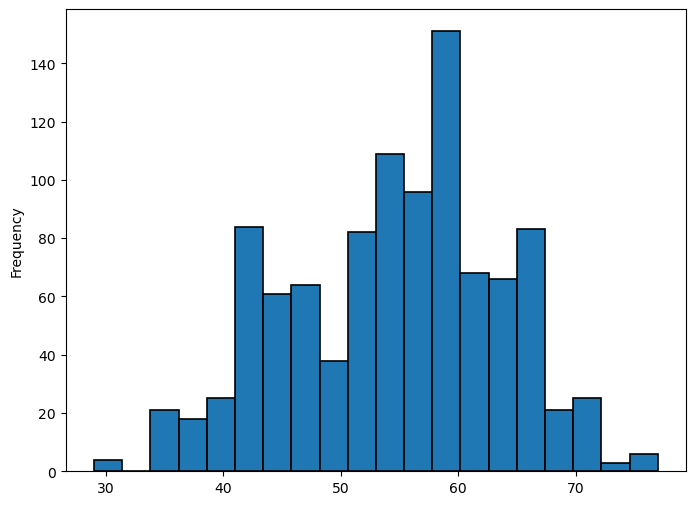

In [49]:
# Check the distribution of the age column with a histogram

df['age'].plot.hist(bins=20, edgecolor='black', linewidth=1.2, figsize=(8,6))

## Heart Disease Frequency per Chest Pain Type

In [51]:
pd.crosstab(df.Chest_Pain_Type, df.Heart_Disease_Indicator)

Heart_Disease_Indicator,0,1
Chest_Pain_Type,,
0,375,122
1,33,134
2,65,219
3,26,51


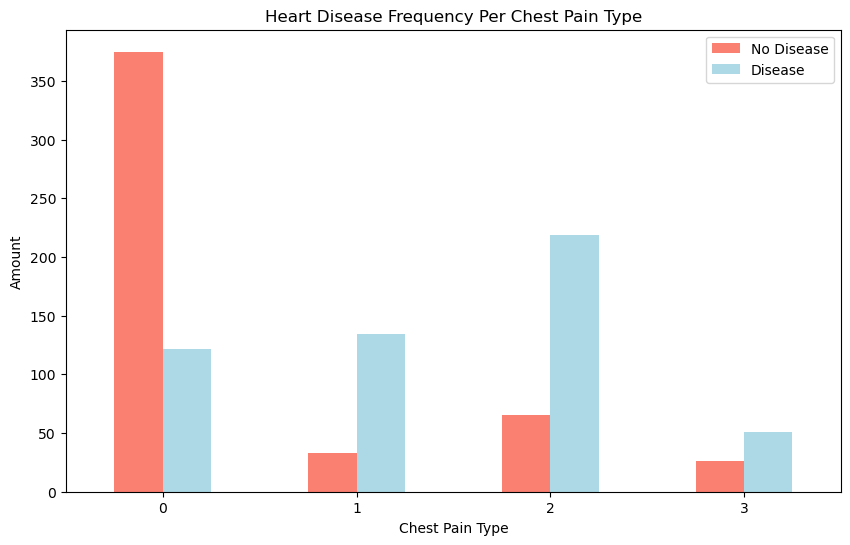

In [52]:
# Make the crosstab more visual
pd.crosstab(df.Chest_Pain_Type, df.Heart_Disease_Indicator).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [53]:
df.head()

,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Slope_of_ST_Segment,Number_of_Major_Vessels,Thalassemia,Heart_Disease_Indicator
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [54]:
df.corr()

,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Slope_of_ST_Segment,Number_of_Major_Vessels,Thalassemia,Heart_Disease_Indicator
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
Chest_Pain_Type,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
Resting_Blood_Pressure,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
Serum_Cholesterol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
Fasting_Blood_Sugar,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
Resting_ECG_Results,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
Max_Heart_Rate_Achieved,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
Exercise_Induced_Angina,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
ST_Depression,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


(14.0, 0.0)

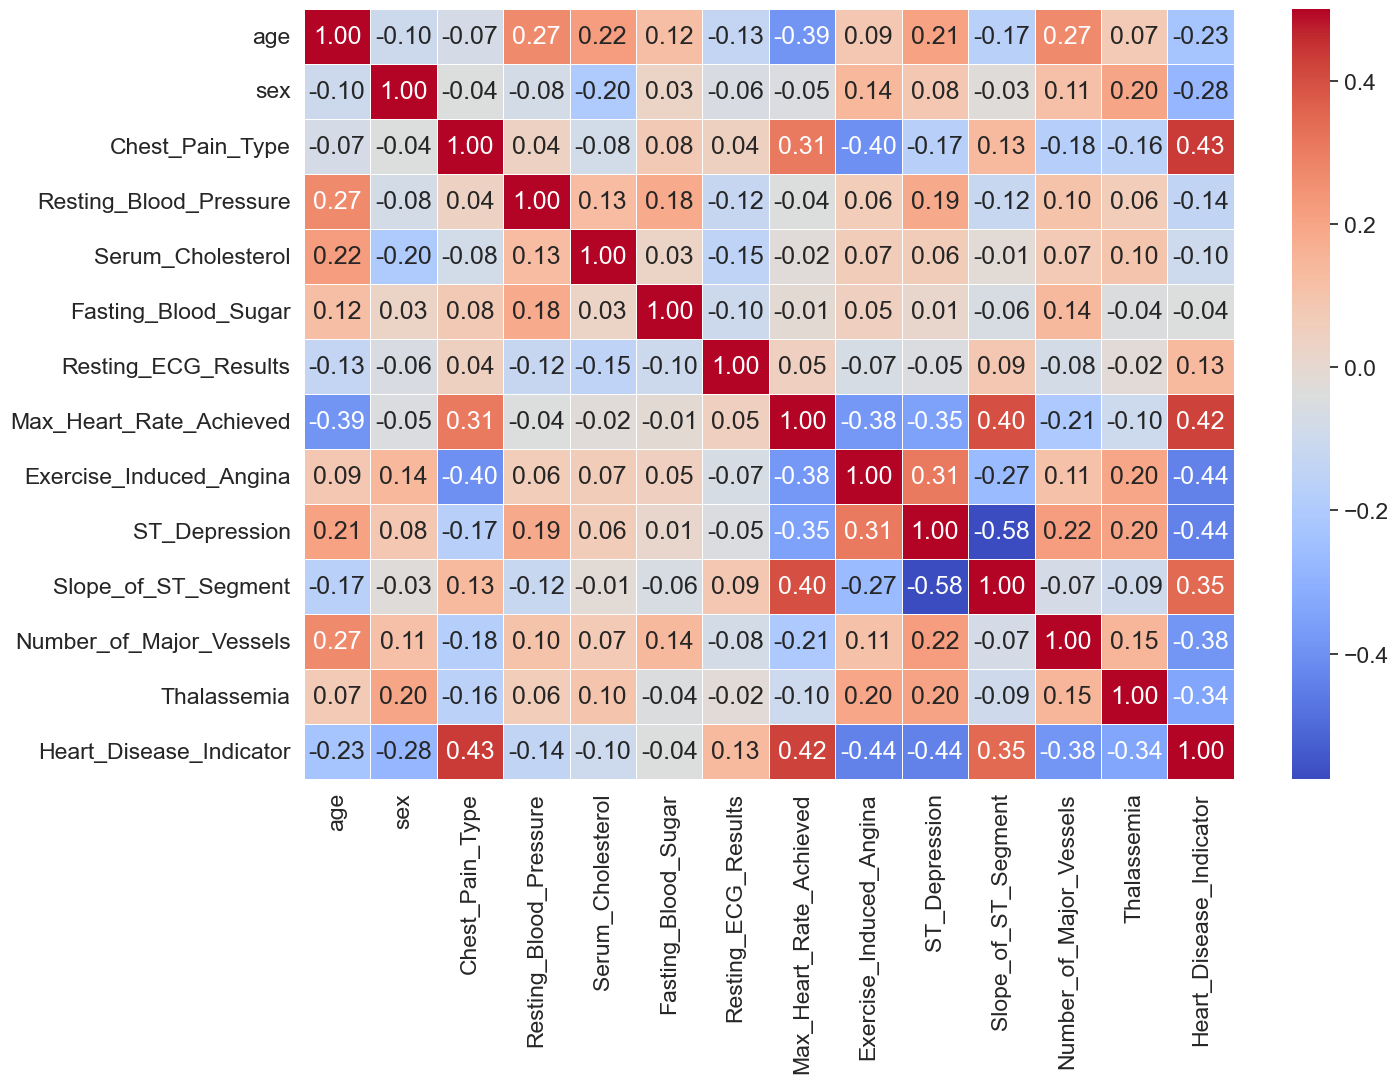

In [120]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",vmax=.5,
                 cmap="coolwarm");
bottom, top = ax.get_ylim()
ax.set_ylim()

## 5. Building the Model

In [56]:
df.head()

,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Slope_of_ST_Segment,Number_of_Major_Vessels,Thalassemia,Heart_Disease_Indicator
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [57]:
# Split data into X and y
X = df.drop("Heart_Disease_Indicator", axis=1)

y = df["Heart_Disease_Indicator"]

In [58]:
X

,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Slope_of_ST_Segment,Number_of_Major_Vessels,Thalassemia
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [59]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: Heart_Disease_Indicator, Length: 1025, dtype: int64

In [63]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
                                                    
                                                   

In [61]:
X_train

,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Slope_of_ST_Segment,Number_of_Major_Vessels,Thalassemia
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [62]:
y_train, len(y_train)

(835    0
 137    1
 534    1
 495    1
 244    1
       ..
 700    1
 71     0
 106    0
 270    1
 860    0
 Name: Heart_Disease_Indicator, Length: 820, dtype: int64,
 820)

In [136]:
# hyperparameter tunning , using grid search ...

rf_grid = {"n_estimators": [50, 100, 200],
           "max_depth": [None, 10, 20],
           "min_samples_split": [2, 5, 10],
           "min_samples_leaf": [1, 2, 4]}

gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_grid, cv=5, verbose=True, n_jobs=-1)
gs_rf.fit(X_train, y_train)

# Best parameters & model performance
print("Best parameters for Random Forest:", gs_rf.best_params_)
rf_best = gs_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [104]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000,class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [105]:
y_pred_lr = lr.predict(X_test)

In [141]:
from sklearn.tree import DecisionTreeClassifier

# Base model with depth limitation to prevent overfitting
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [142]:
y_pred_dt = dt.predict(X_test) 

In [102]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [103]:
y_pred_rf = rf.predict(X_test) 

In [100]:
# Train AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100,random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [101]:
y_pred_ada = ada.predict(X_test)

In [98]:
# Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [99]:
y_pred_gbc = gbc.predict(X_test)

In [72]:
# Print Results
models = {"Logistic Regression": y_pred_lr,"Desicion forest":y_pred_dt,"Random Forest": y_pred_rf, "AdaBoost": y_pred_ada, "Gradient Boosting": y_pred_gbc,  }
for name, y_pred in models.items():
    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

Random Forest Accuracy: 0.9853658536585366
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

--------------------------------------------------
AdaBoost Accuracy: 0.8926829268292683
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       102
           1       0.92      0.86      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

--------------------------------------------------
Gradient Boosting Accuracy: 0.9317073170731708
Gradient Boosting Classification Report:
    

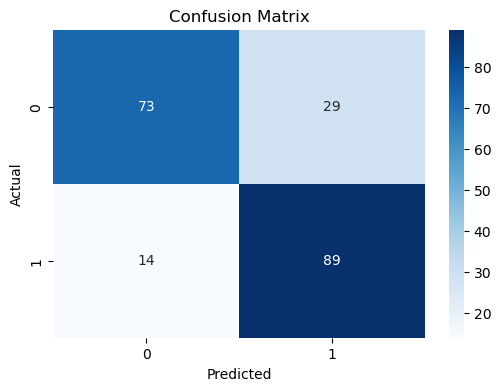

In [75]:
# Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [106]:
import sklearn
print(sklearn.__version__)


1.4.2


In [109]:
import pickle

pickle.dump(ada,open(r"D:\cp2.pkl",'wb'))

In [111]:
X_train.head()

,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Slope_of_ST_Segment,Number_of_Major_Vessels,Thalassemia
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
